In [1]:
import sys 
sys.path.append("/n/home12/binxuwang/Github/DiffusionReasoning")
from tensorboard_utils import extract_all_runs, extract_tensorboard_data_from_run, extract_last_step_summary
from training_run_analysis_utils import streaming_dataset_size_extract, sweep_collect_eval_data, extract_rule_list_from_eval_col, extract_rule_list_from_eval_col_Diffusion, format_rule_list_to_mat, visualize_train_heldout_rule, visualize_indiv_rule_dynam

from rule_new_utils import rule_table, relation_dict, attribute_dict
from stats_plot_utils import add_rectangles

/n/home12/binxuwang/Github/circuit_toolkit/circuit_toolkit/GAN_invert_utils.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


In [ ]:
from rule_new_utils import rule_table, relation_dict, attribute_dict
from stats_plot_utils import add_rectangles

In [2]:
import os
import numpy as np
import pandas as pd
import torch
from os.path import join
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import trange, tqdm
from circuit_toolkit.plot_utils import saveallforms


### Paths

In [3]:
tabdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Tables"
figdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Figures_newrule"

GPT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/GPT2_raven"
DiT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results"
SSM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/Mamba_raven"
EDM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps"

In [4]:
figroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning"
GPTfigdir = join(figroot, "GPT2_raven")
EDMfigdir = join(figroot, "EDM_raven")
DiTfigdir = join(figroot, "DiT_raven")
SSMfigdir = join(figroot, "SSM_raven")

In [5]:
import pandas as pd
# Set the maximum column width to 100 characters
pd.set_option('display.max_colwidth', 100)

In [6]:
syndf_DiT = pd.read_csv(join(tabdir, "DiT_raven_tensorboard_data.csv"), index_col=0)
tb_data_col_DiT = pkl.load(open(join(tabdir, "DiT_raven_tensorboard_raw_data.pkl"), "rb"))

In [7]:
syndf_DiT.index

Index(['096-uncond-DiT_B_1-stream0_16M', '091-uncond-DiT_B_1-stream16M',
       '085-uncond-DiT_S_1-stream0_16M', '087-uncond-DiT_S_1-stream16M',
       '090-uncond-DiT_S_1-stream0_16M_heldout0',
       '095-uncond-DiT_B_1-stream16M_heldout0',
       '086-uncond-DiT_S_1-stream1_6M', '092-uncond-DiT_B_1-stream1_6M',
       '089-uncond-DiT_S_1-stream1_6M_heldout0',
       '093-uncond-DiT_B_1-stream1_6M_heldout0',
       '088-uncond-DiT_S_1-stream16M_heldout0',
       '094-uncond-DiT_B_1-stream0_16M_heldout0'],
      dtype='object', name='run_name')

In [10]:
syndf_DiT.loc['090-uncond-DiT_S_1-stream0_16M_heldout0']

Loss/average                                                                                          0.095534
Loss/batch                                                                                            0.094757
Rules/anyvalid                                                                                        0.734701
Rules/anyvalid_cnt                                                                                      4514.0
Rules/c2                                                                                               0.14209
Rules/c2_cnt                                                                                             291.0
Rules/c3                                                                                              0.571289
Rules/c3_cnt                                                                                            1170.0
Speed/steps_per_sec                                                                                  18.949669
f

Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/samples
example file: 0155000.pt


  0%|          | 0/401 [00:00<?, ?it/s]

100%|██████████| 401/401 [00:33<00:00, 12.15it/s]


diffusion model, just fetch ab init generation
(401, 2048, 3) (401, 2, 2048)
090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204


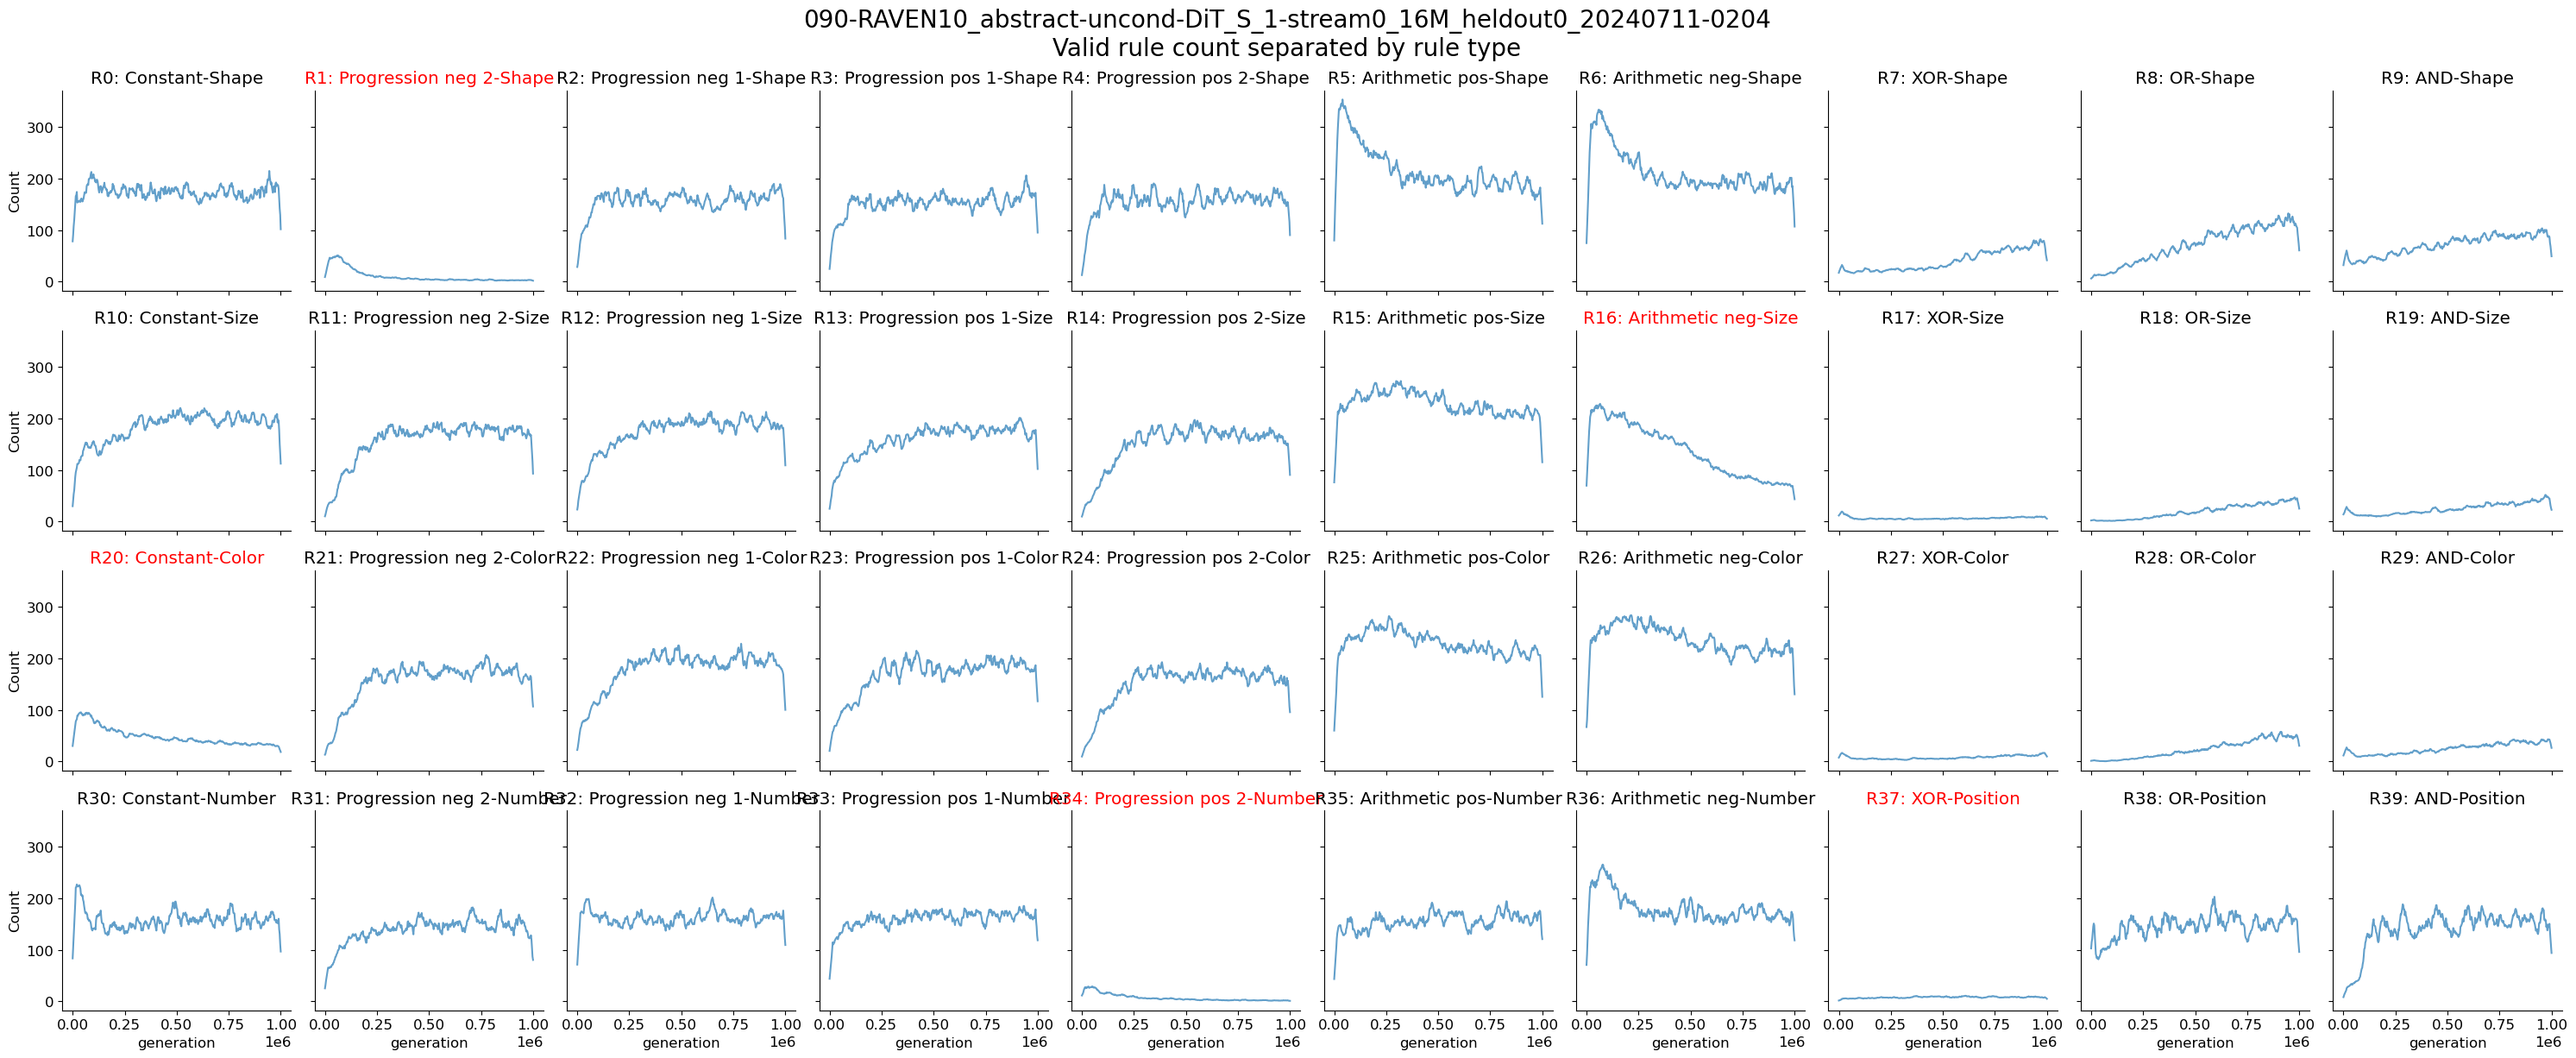

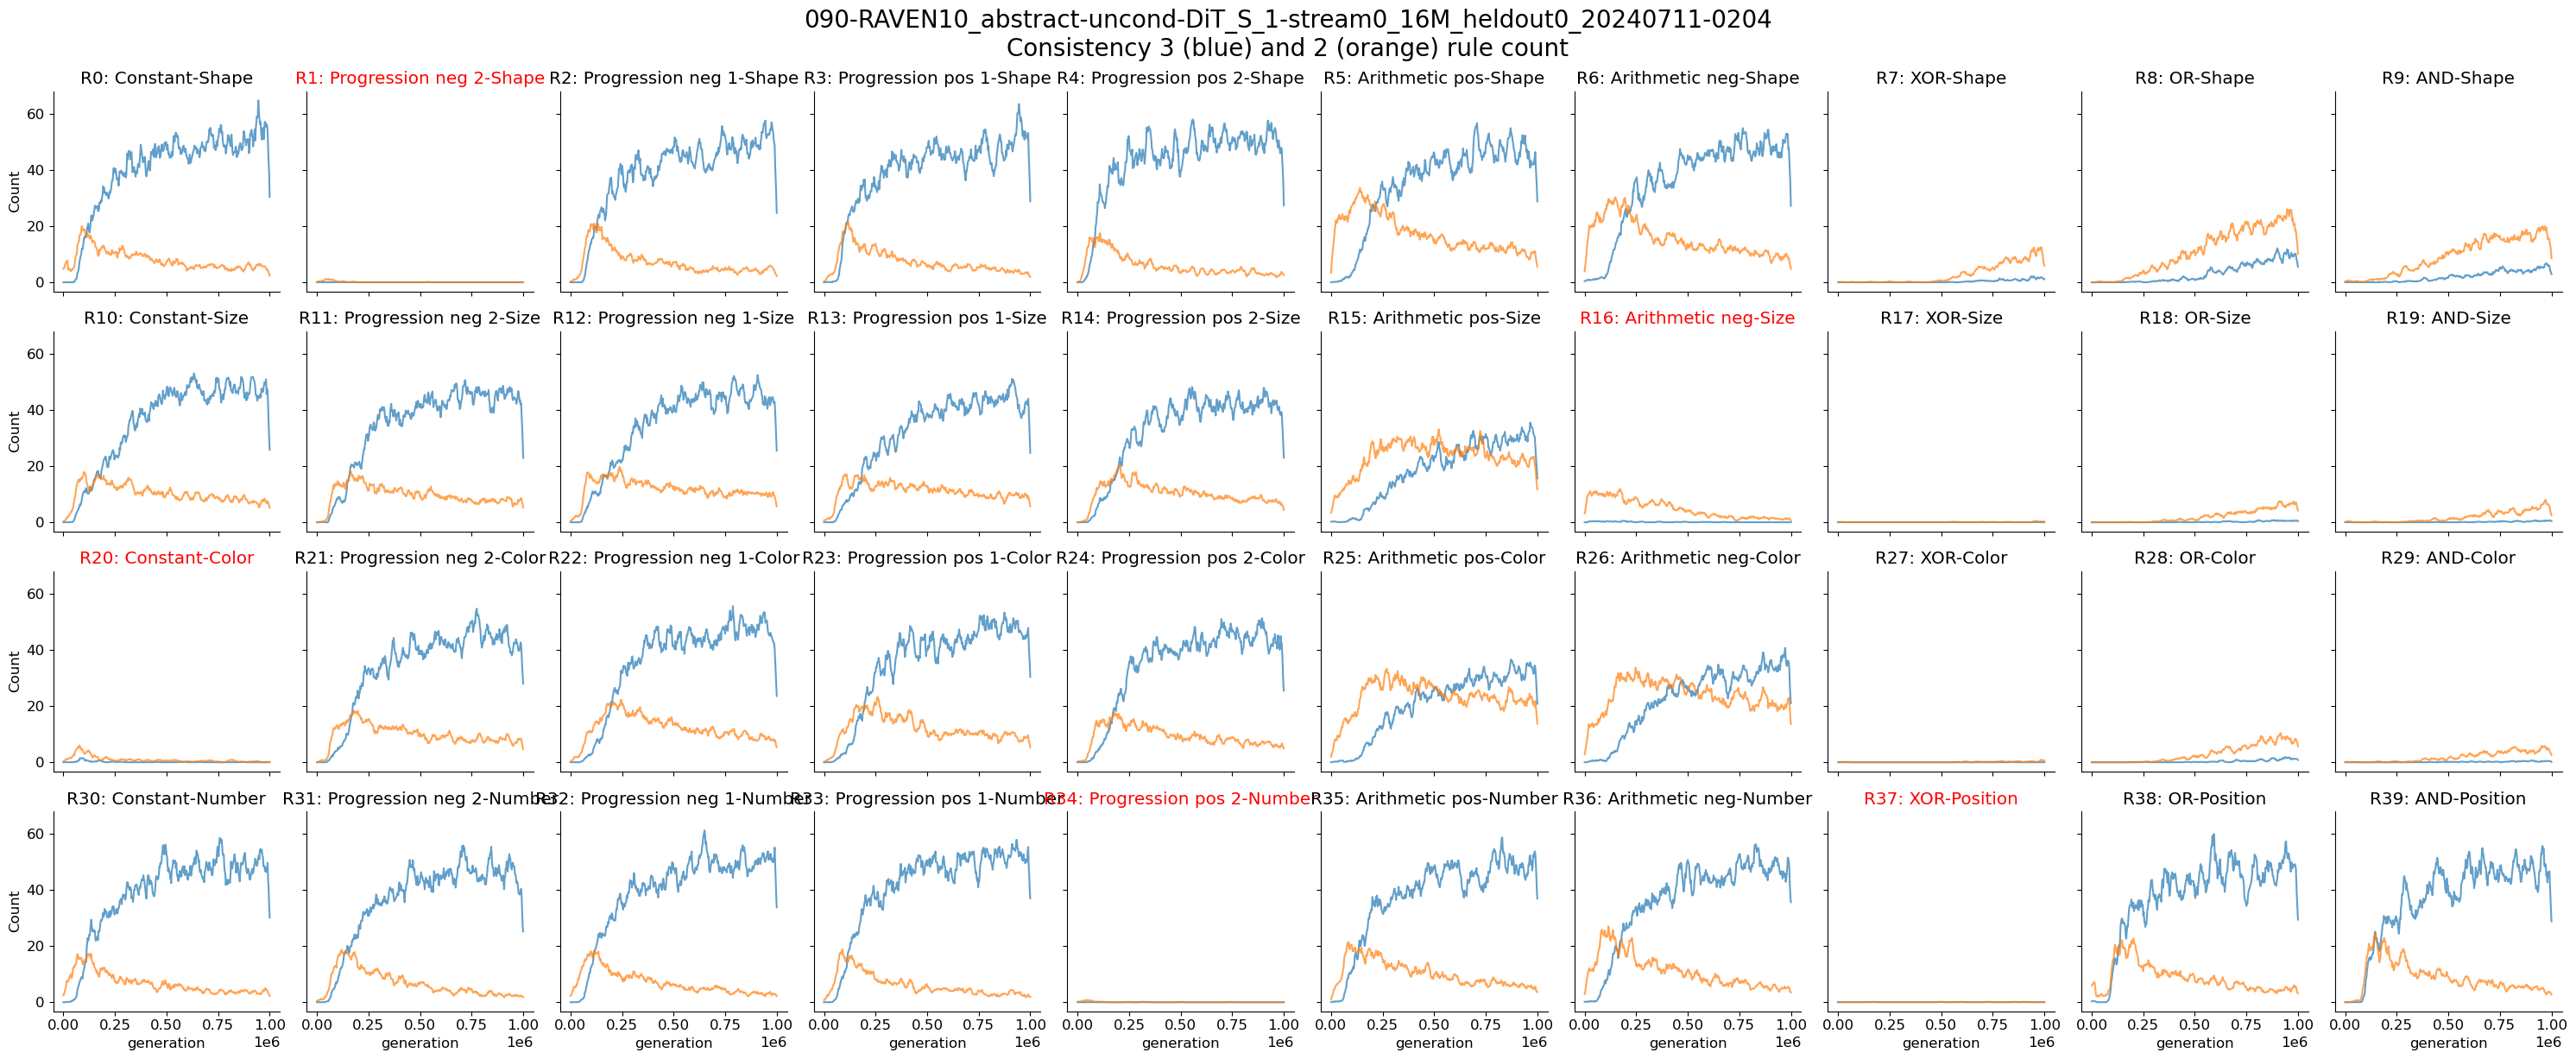

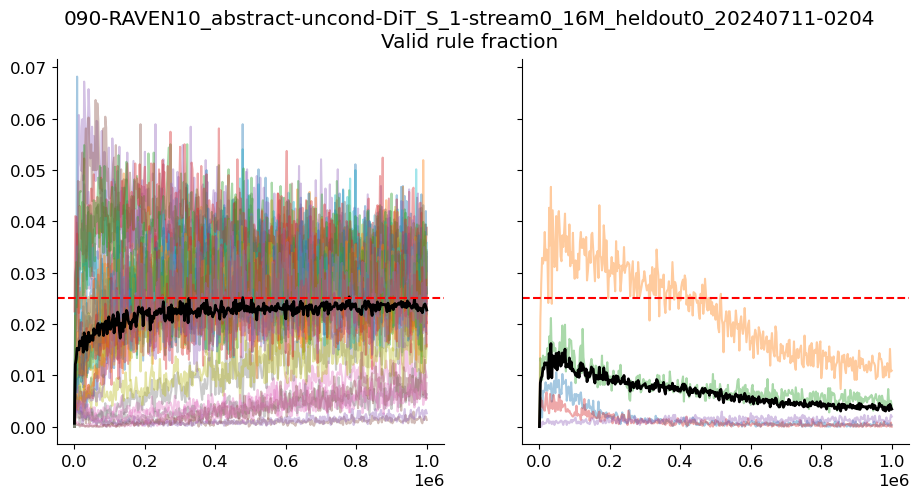

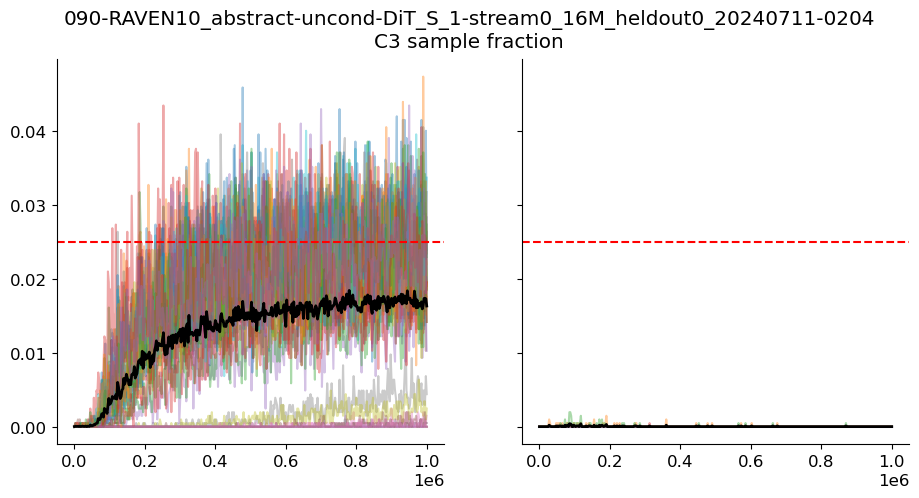

In [11]:
# for expfullname in syndf_DiT.full_name:
expfullname = syndf_DiT.loc['090-uncond-DiT_S_1-stream0_16M_heldout0'].full_name
tb_record = tb_data_col_DiT[expfullname]
expname = expfullname.split("/tensorboard_logs")[0]
prefix = "sample_rule_eval_" #"eval_step" if "stream" in expname else "eval_epoch"
eval_col = sweep_collect_eval_data(expname, DiT_exproot, prefix=prefix)
epoch_list, rule_list_all, consistency_all = extract_rule_list_from_eval_col_Diffusion(eval_col, )
rule_cnt_mat, cons3_rule_cnt_mat, cons2_rule_cnt_mat = format_rule_list_to_mat(rule_list_all, consistency_all)
eval_sample_num = rule_list_all.shape[1]
print(expname)
if "heldout0" in expname:
    heldout_id = [1, 16, 20, 34, 37]  
else:
    heldout_id = []

figh, axs = visualize_indiv_rule_dynam(epoch_list, rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                        titlestr=f"{expname}\nValid rule count separated by rule type")
# saveallforms(DiTfigdir, f"{expname}_indiv_rule_validity", figh)

figh, axs = visualize_indiv_rule_dynam(epoch_list, cons3_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                    titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", )
figh, axs = visualize_indiv_rule_dynam(epoch_list, cons2_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                    titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", axs=axs)
# saveallforms(DiTfigdir, f"{expname}_indiv_rule_consistency", figh)

figh = visualize_train_heldout_rule(epoch_list, rule_cnt_mat, heldout_id, 
                            normalizer=eval_sample_num * 3, reflevel=1 / 40,
                            titlestr=f"{expname}\nValid rule fraction")
# saveallforms(DiTfigdir, f"{expname}_train_held_rule_validity", figh)

figh = visualize_train_heldout_rule(epoch_list, cons3_rule_cnt_mat, heldout_id, 
                            normalizer=eval_sample_num, reflevel=1 / 40,
                            titlestr=f"{expname}\nC3 sample fraction")
# saveallforms(DiTfigdir, f"{expname}_train_held_rule_consistency", figh)

In [12]:
rule_cnt_mat.shape

(401, 40)

In [13]:
rule_cnt_mat.dtype

dtype('float64')

In [32]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_mean_sem_under_masks(xarray, label_mask_dict, rule_cnt_mat, commonmask=None):
    """
    Plots the mean and SEM of rule_cnt_mat for each binary mask in label_mask_dict.

    Parameters:
    label_mask_dict (dict): Dictionary with labels as keys and binary masks as values.
    rule_cnt_mat (np.ndarray): Matrix of rule counts.
    """
    figh = plt.figure()
    for label, mask in label_mask_dict.items():
        # Ensure the mask is a boolean array
        # mask = np.array(mask, dtype=bool)
        if commonmask is not None:
            mask = mask & commonmask
        
        # Compute the mean and SEM for the masked rule_cnt_mat
        masked_data = rule_cnt_mat[:, mask]
        mean = np.mean(masked_data, axis=1)
        sem = stats.sem(masked_data, axis=1)
        
        # Plot the mean with shaded error bars
        # plt.errorbar(xarray, mean, yerr=sem, label=label, capsize=5)
        # Use shaded region instead of error bars
        plt.plot(xarray, mean, label=label, alpha=0.7)
        plt.fill_between(xarray, mean - sem, mean + sem, alpha=0.2)
    
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Mean and SEM of rule_cnt_mat')
    plt.legend()
    return figh

In [40]:
heldout_mask = np.zeros(40, dtype=bool)
heldout_mask[heldout_id] = True

In [44]:
figsyndir = r'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/Figure_ruletype_dynamics'

In [64]:
relation_dict_short = {k: v.replace("Progression","Prog.").replace("Arithmetic","Arith.").\
                            replace("pos ","+").replace("neg ","-").\
                            replace("pos","+").replace("neg","-")\
                                for k, v in relation_dict.items()}

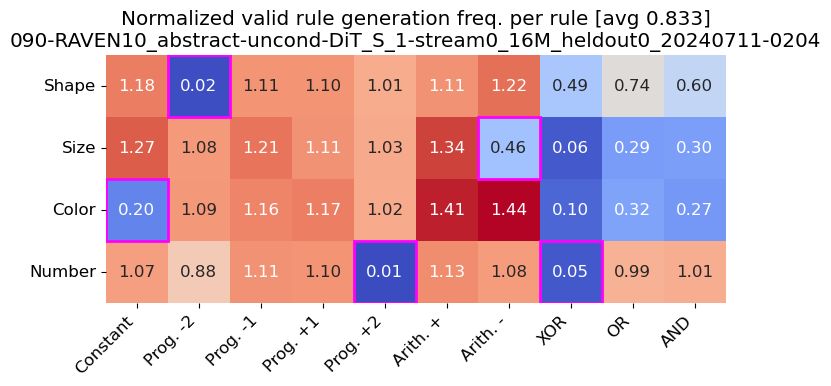

In [82]:
plotinput = (rule_cnt_mat / 3 / eval_sample_num * 40)
plotmat = plotinput[-20:, :].mean(axis=0).reshape(4, -1)
plt.figure(figsize=(8, 6))
sns.heatmap(plotmat, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
add_rectangles(heldout_id, edgecolor="magenta", )
plt.axis("image")
plt.title(f"Normalized valid rule generation freq. per rule [avg {plotmat.mean():.3f}]\n{expname}")
plt.xticks(ticks=np.arange(10)+0.5, labels=[relation_dict_short[i] for i in range(10)], rotation=45, ha="right")
plt.yticks(ticks=np.arange(4)+0.5, labels=[attribute_dict[i] for i in range(4)], rotation=0)
saveallforms(figsyndir, f"{expname}_rule_gen_freq_heatmap_validrow", )

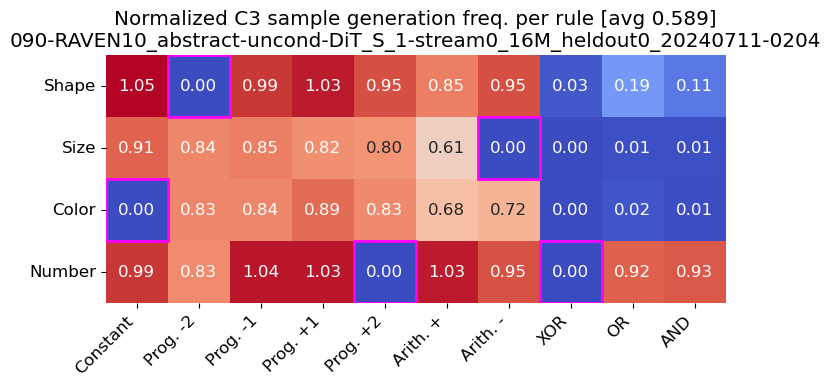

In [81]:
plotinput = (cons3_rule_cnt_mat / eval_sample_num * 40)
plotmat = plotinput[-20:, :].mean(axis=0).reshape(4, -1)
plt.figure(figsize=(8, 6))
sns.heatmap(plotmat, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
add_rectangles(heldout_id, edgecolor="magenta", )
plt.axis("image")
plt.title(f"Normalized C3 sample generation freq. per rule [avg {plotmat.mean():.3f}]\n{expname}")
plt.xticks(ticks=np.arange(10)+0.5, labels=[relation_dict_short[i] for i in range(10)], rotation=45, ha="right")
plt.yticks(ticks=np.arange(4)+0.5, labels=[attribute_dict[i] for i in range(4)], rotation=0)
saveallforms(figsyndir, f"{expname}_rule_gen_freq_heatmap_C3sample", )

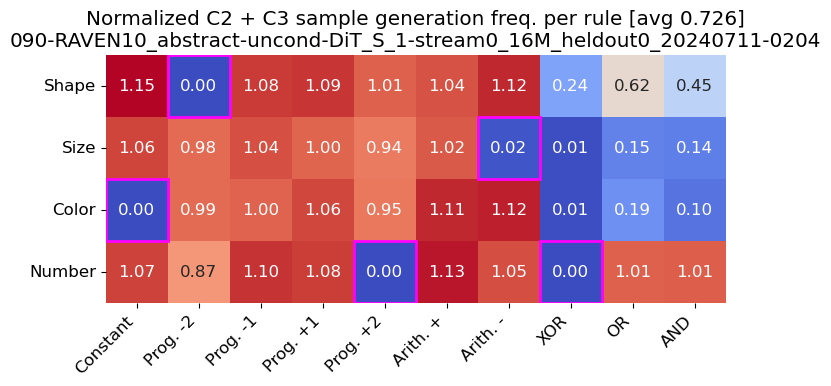

In [83]:
plotinput = ((cons3_rule_cnt_mat + cons2_rule_cnt_mat) / eval_sample_num * 40)
plotmat = plotinput[-20:, :].mean(axis=0).reshape(4, -1)
plt.figure(figsize=(8, 6))
sns.heatmap(plotmat, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
add_rectangles(heldout_id, edgecolor="magenta", )
plt.axis("image")
plt.title(f"Normalized C2 + C3 sample generation freq. per rule [avg {plotmat.mean():.3f}]\n{expname}")
plt.xticks(ticks=np.arange(10)+0.5, labels=[relation_dict_short[i] for i in range(10)], rotation=45, ha="right")
plt.yticks(ticks=np.arange(4)+0.5, labels=[attribute_dict[i] for i in range(4)], rotation=0)
saveallforms(figsyndir, f"{expname}_rule_gen_freq_heatmap_C23sample", )

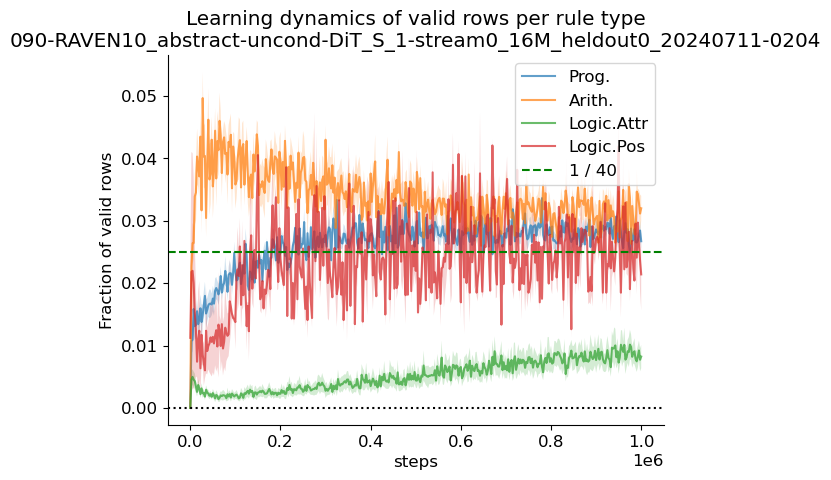

In [45]:
masks_dict = {
    "Prog." : (np.arange(40) %10 < 5),
    "Arith." : (np.arange(40) %10 >= 5) & (np.arange(40) %10 < 7),
    "Logic.Attr" : (np.arange(40) %10 >= 7) & (np.arange(40) < 30),
    "Logic.Pos" : (np.arange(40) %10 >= 7) & (np.arange(40) > 30),
}
figh = plot_mean_sem_under_masks(epoch_list, masks_dict, rule_cnt_mat / eval_sample_num / 3, commonmask=~heldout_mask)
plt.title(f"Learning dynamics of valid rows per rule type\n{expname}")
plt.ylabel("Fraction of valid rows")
plt.xlabel("steps")
plt.axhline(1/40, color='g', linestyle='--', label='1 / 40')
plt.axhline(0, color='k', linestyle=':',)
plt.legend()
saveallforms(figsyndir, f"{expname}_ruletype_dynamics_validrow", figh)

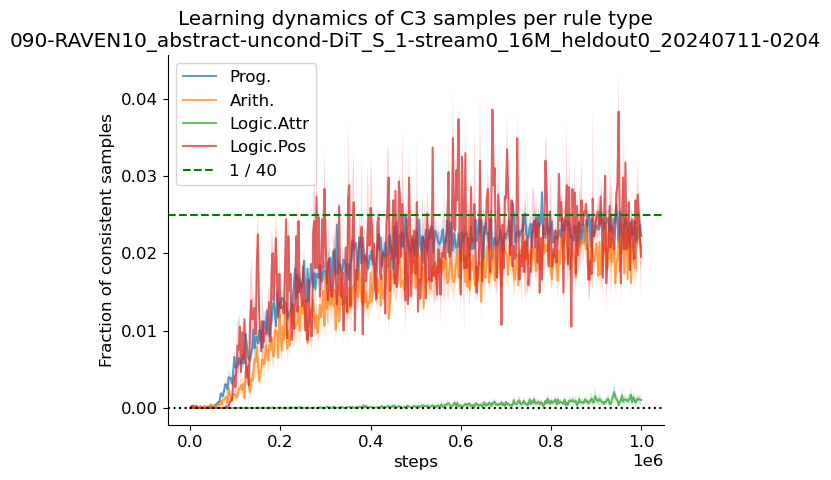

In [46]:
masks_dict = {
    "Prog." : (np.arange(40) %10 < 5),
    "Arith." : (np.arange(40) %10 >= 5) & (np.arange(40) %10 < 7),
    "Logic.Attr" : (np.arange(40) %10 >= 7) & (np.arange(40) < 30),
    "Logic.Pos" : (np.arange(40) %10 >= 7) & (np.arange(40) > 30),
}
figh = plot_mean_sem_under_masks(epoch_list, masks_dict, cons3_rule_cnt_mat / eval_sample_num, commonmask=~heldout_mask)
plt.title(f"Learning dynamics of C3 samples per rule type\n{expname}")
plt.ylabel("Fraction of consistent samples")
plt.xlabel("steps")
plt.axhline(1/40, color='g', linestyle='--', label='1 / 40')
plt.axhline(0, color='k', linestyle=':',)
plt.legend()
saveallforms(figsyndir, f"{expname}_ruletype_dynamics_C3sample", figh)

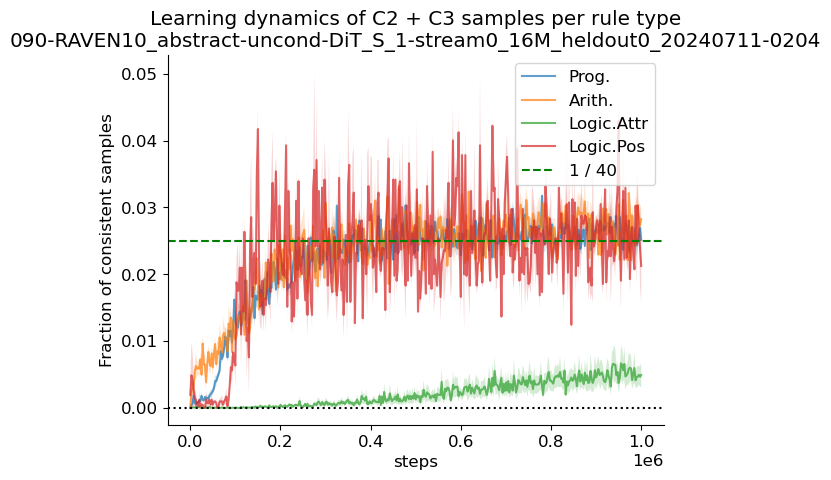

In [47]:
masks_dict = {
    "Prog." : (np.arange(40) %10 < 5),
    "Arith." : (np.arange(40) %10 >= 5) & (np.arange(40) %10 < 7),
    "Logic.Attr" : (np.arange(40) %10 >= 7) & (np.arange(40) < 30),
    "Logic.Pos" : (np.arange(40) %10 >= 7) & (np.arange(40) > 30),
}
figh = plot_mean_sem_under_masks(epoch_list, masks_dict, (cons3_rule_cnt_mat + cons2_rule_cnt_mat) / eval_sample_num, commonmask=~heldout_mask)
plt.title(f"Learning dynamics of C2 + C3 samples per rule type\n{expname}")
plt.ylabel("Fraction of consistent samples")
plt.xlabel("steps")
plt.axhline(1/40, color='g', linestyle='--', label='1 / 40')
plt.axhline(0, color='k', linestyle=':',)
plt.legend()
saveallforms(figsyndir, f"{expname}_ruletype_dynamics_C23sample", figh)

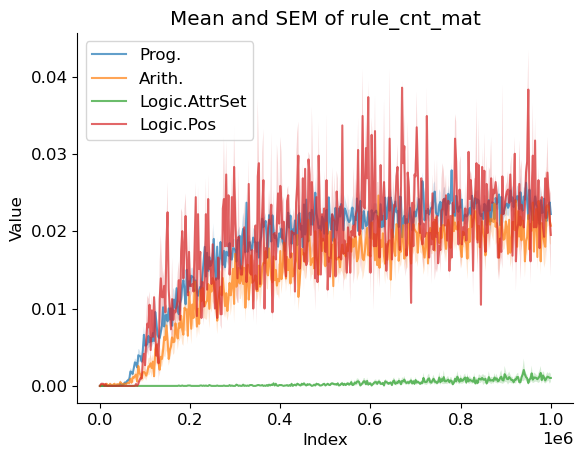

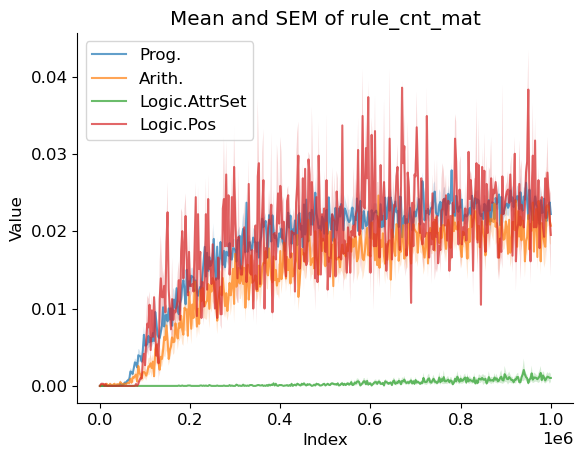

In [33]:
masks_dict = {
    "Prog." : (np.arange(40) %10 < 5),
    "Arith." : (np.arange(40) %10 >= 5) & (np.arange(40) %10 < 7),
    "Logic.AttrSet" : (np.arange(40) %10 >= 7) & (np.arange(40) < 30),
    "Logic.Pos" : (np.arange(40) %10 >= 7) & (np.arange(40) > 30),
}

plot_mean_sem_under_masks(epoch_list, masks_dict, cons3_rule_cnt_mat / eval_sample_num, commonmask=~heldout_mask)

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


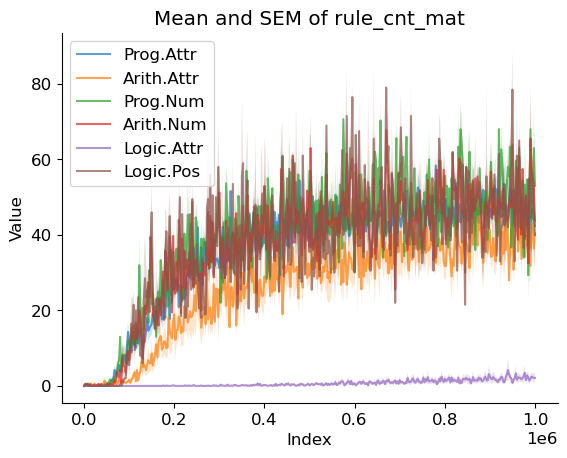

In [28]:
heldout_mask = np.zeros(40, dtype=bool)
heldout_mask[heldout_id] = True
masks_dict = {
    "Prog.Attr" : (np.arange(40) %10 < 5) & (np.arange(40) < 30),
    "Arith.Attr" : (np.arange(40) %10 >= 5) & (np.arange(40) %10 < 7) & (np.arange(40) < 30),
    "Prog.Num" : (np.arange(40) %10 < 5) & (np.arange(40) > 30),
    "Arith.Num" : (np.arange(40) %10 >= 5) & (np.arange(40) > 30),
    "Logic.Attr" : (np.arange(40) %10 >= 7) & (np.arange(40) < 30),
    "Logic.Pos" : (np.arange(40) %10 >= 7) & (np.arange(40) > 30),
}

plot_mean_sem_under_masks(epoch_list, masks_dict, cons3_rule_cnt_mat, commonmask=~heldout_mask)

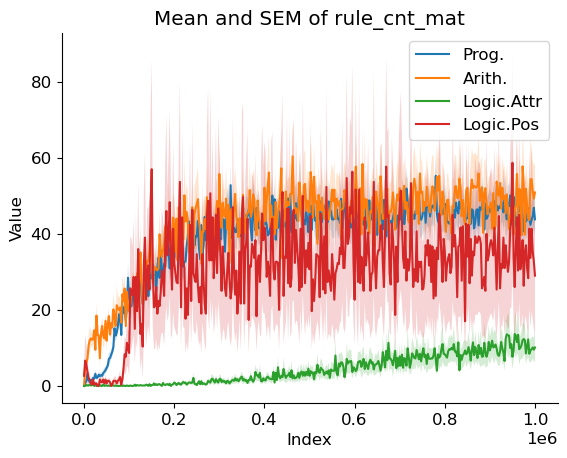

In [22]:
masks_dict = {
    "Prog." : (np.arange(40) %10 < 5),
    "Arith." : (np.arange(40) %10 >= 5) & (np.arange(40) %10 < 7),
    "Logic.Attr" : (np.arange(40) %10 >= 7) & (np.arange(40) < 30),
    "Logic.Pos" : (np.arange(40) %10 >= 7) & (np.arange(40) > 30),
}

plot_mean_sem_under_masks(epoch_list, masks_dict, cons3_rule_cnt_mat + cons2_rule_cnt_mat)